## 1. Manejo de Conjuntos de Datos con Pandas

Podemos adquirir un CSV o algunos otros conjuntos de datos desde un archivo local (o cargado directamente al Colab), pero también podemos hacerlo desde su URL.

In [5]:
import pandas as pd

# Abrimos los datos desde la URL
data = pd.read_csv("https://www.fdic.gov/bank/individual/failed/banklist.csv",
                   encoding="latin-1")

# Renombramos las columnas a nombres sin espacios ni cambios de mayúsuculas a minúsculas
data.columns = ["BANK_NAME", "CITY", "STATE", "CERTIFIED", "INSTITUTION", "CLOSING_DATE", "FUND"]

# Mostras 5 registros aleatorios
data.sample(5)

,BANK_NAME,CITY,STATE,CERTIFIED,INSTITUTION,CLOSING_DATE,FUND
280,Turnberry Bank,Aventura,FL,32280,NAFH National Bank,16-Jul-10,10261
549,Farmers Bank of Cheneyville,Cheneyville,LA,16445,Sabine State Bank & Trust,17-Dec-02,4659
1,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",12-Mar-23,10540
205,American Trust Bank,Roswell,GA,57432,Renasant Bank,4-Feb-11,10336
33,"Frontier Bank, FSB D/B/A El Paseo Bank",Palm Desert,CA,34738,"Bank of Southern California, N.A.",7-Nov-14,10508


In [6]:
# Definimos una función que tome una fecha y extraiga el mes
def extract_month_from_date(date):
  parts = date.split("-")
  return parts[1] # 0 - día, 1 - mes, 2 - año

# Convertimos la columna CLOSING_DATE en la columna MONTH usando nuestro
# transformador de fecha a mes
data["MONTH"] = data["CLOSING_DATE"].map(extract_month_from_date)

# Mostramos 5 ejemplos aleatorios
data.sample(5)

,BANK_NAME,CITY,STATE,CERTIFIED,INSTITUTION,CLOSING_DATE,FUND,MONTH
200,Badger State Bank,Cassville,WI,13272,Royal Bank,11-Feb-11,10339,Feb
297,"Granite Community Bank, NA",Granite Bay,CA,57315,Tri Counties Bank,28-May-10,10244,May
50,"Texas Community Bank, National Association",The Woodlands,TX,57431,"Spirit of Texas Bank, SSB",13-Dec-13,10491,Dec
68,First Federal Bank,Lexington,KY,29594,Your Community Bank,19-Apr-13,10474,Apr
66,Chipola Community Bank,Marianna,FL,58034,First Federal Bank of Florida,19-Apr-13,10473,Apr


In [8]:
# Creamos un dataframe derivado, seleccionando sólo las columnas de análisis
data_study = data[ ["STATE", "MONTH", "FUND"] ]

# Mostramos 5 ejemplos aleatorios del dataframe de estudio
data_study.sample(5)

,STATE,MONTH,FUND
350,IL,Mar,10191
311,MO,Apr,10225
296,NV,May,10245
312,MO,Apr,10227
440,AL,Aug,10103


## 2. Visualización de datos

In [25]:
# Recuperamos la suma de fondos de cada estado
group_state_fund = data_study.groupby("STATE").sum("FUND").sort_values(by=["FUND"], ascending=False)

group_state_fund.head(5)

,FUND
STATE,
GA,948949
FL,764744
IL,694783
CA,432940
MN,235976


In [26]:
# Calculamos la suma de fondos de cada estado y recuperamos
# los valores de la columna "FUND" que representa la suma de fondos de cada estado
funds = group_state_fund["FUND"].values

funds

array([948949, 764744, 694783, 432940, 235976, 194884, 164012, 158881,
       137544, 127397, 122013, 113059, 108426, 103460, 103027, 102931,
        97682,  81074,  78344,  76253,  72472,  72246,  71730,  67436,
        60888,  55938,  51712,  41232,  41203,  35794,  35498,  31127,
        30929,  30760,  20601,  20550,  20549,  20530,  15145,  10211,
        10081,  10080,   4647,   4645])

In [27]:
# Calculamos la suma de fondos de cada estado y transponemos las columnas
# para que cada columna sea el estado, y así recuperar la lista de estados
states = group_state_fund.T.columns

states

Index(['GA', 'FL', 'IL', 'CA', 'MN', 'WA', 'MO', 'AZ', 'MI', 'TX', 'NV', 'KS',
       'WI', 'SC', 'MD', 'CO', 'PA', 'OH', 'NJ', 'UT', 'OK', 'NC', 'AL', 'TN',
       'OR', 'NY', 'VA', 'NE', 'PR', 'LA', 'AR', 'KY', 'IN', 'NM', 'MS', 'WV',
       'ID', 'IA', 'CT', 'MA', 'SD', 'WY', 'NH', 'HI'],
      dtype='object', name='STATE')

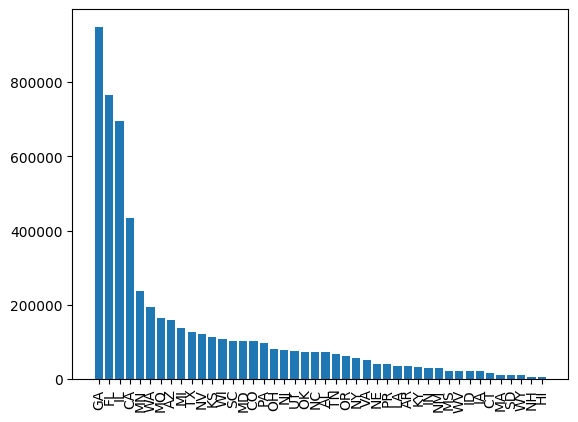

In [28]:
import matplotlib.pyplot as plt

plt.bar(states, funds)

plt.xticks(rotation=90)

plt.show()

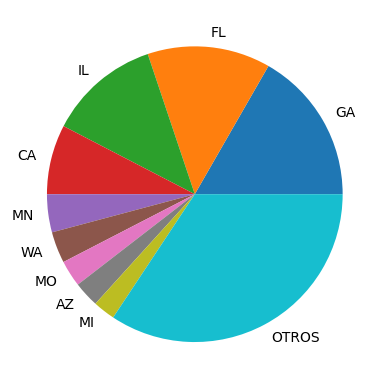

In [44]:
top = 9

plt.pie(list(funds[:top]) + [funds[top:].sum()], labels=list(states[:top]) + ["OTROS"])

plt.show()

## 3. Adquisición por Scrapydo

In [ ]:
! pip install scrapydo

In [50]:
import scrapydo

scrapydo.setup()

def parser(response):
  links = response.xpath("//a[@data-format='csv']/@href").getall()
  yield {
      "links": links
  }

scrapydo.crawl("https://catalog.data.gov/dataset", callback=parser)


It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. This is so for backward compatibility reasons, but it will change in a future version of Scrapy.

See the documentation of the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting for information on how to handle this deprecation.


[{'links': ['https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD',
   'https://www.fdic.gov/bank/individual/failed/banklist.csv',
   'https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD',
   'https://data.ny.gov/api/views/d6yy-54nr/rows.csv?accessType=DOWNLOAD',
   'https://data.cdc.gov/api/views/9j2v-jamp/rows.csv?accessType=DOWNLOAD',
   'https://data.cdc.gov/api/views/g4ie-h725/rows.csv?accessType=DOWNLOAD',
   'https://edg.epa.gov/EPADataCommons/public/OA/EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv',
   'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD',
   'https://files.consumerfinance.gov/ccdb/complaints.csv.zip',
   'https://data.cityofnewyork.us/api/views/kku6-nxdu/rows.csv?accessType=DOWNLOAD',
   'https://www.usitc.gov/sites/default/files/tata/hts/hts_2023_revision_8_csv.csv',
   'https://www.usitc.gov/sites/default/files/tata/hts/hts_2023_revision_7_csv.csv',
   'https://data.openei.org/files/5650/iou_z

In [54]:
import scrapydo

scrapydo.setup()

def parser(response):
  for link_node in response.xpath("//a[@data-format='csv']"):
    title = link_node.xpath("../../../h3/a/text()").get()
    url = link_node.xpath("./@href").get()
    yield { "title": title, "url": url }

scrapydo.crawl("https://catalog.data.gov/dataset", callback=parser)

[{'title': 'Electric Vehicle Population Data',
  'url': 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'},
 {'title': 'FDIC Failed Bank List',
  'url': 'https://www.fdic.gov/bank/individual/failed/banklist.csv'},
 {'title': 'Crime Data from 2020 to Present',
  'url': 'https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD'},
 {'title': 'Lottery Powerball Winning Numbers: Beginning 2010',
  'url': 'https://data.ny.gov/api/views/d6yy-54nr/rows.csv?accessType=DOWNLOAD'},
 {'title': 'Death rates for suicide, by sex, race, Hispanic origin, and age: United States',
  'url': 'https://data.cdc.gov/api/views/9j2v-jamp/rows.csv?accessType=DOWNLOAD'},
 {'title': 'U.S. Chronic Disease Indicators (CDI)',
  'url': 'https://data.cdc.gov/api/views/g4ie-h725/rows.csv?accessType=DOWNLOAD'},
 {'title': 'Walkability Index',
  'url': 'https://edg.epa.gov/EPADataCommons/public/OA/EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv'},
 {'title': 'Motor Vehicle Collisions -